In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Скачать данные
# Download data

In [40]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv")

# print(data.shape)

data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [41]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

# Замените отсутствующие данные
# replace missing values

In [43]:
# определить нулевых значений в каждом столбце
# determine the null values in each column

data = data.replace("?", np.nan)
data = data.infer_objects()

data.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [44]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


## шаг 2: Замените отсутствующие данные медианой
## step 2: Replace missing data with median

Здесь мы просто заменяем недостающие данные на медиану, что конечно повлияет на результаты прогноза, но для целей обучения это не так важно.

Here we simply replace the missing data with the median, which of course will affect the prediction results, but for learning purposes, it is not so important.

На самом деле, книга (https://christophm.github.io/interpretable-ml-book/cervical.html) уже обрабатывала данные.
"Чтобы воспроизвести примеры из этой книги с этим набором данных, найдите R-скрипт предварительной обработки и окончательный файл RData (https://github.com/christophM/interpretable-ml-book/blob/master/R/get-cervical-cancer-dataset.R) в репозитории книги на Github.(https://github.com/christophM/interpretable-ml-book/blob/master/data/cervical.RData)"

Actually, the book(https://christophm.github.io/interpretable-ml-book/cervical.html) has already processed data.
"To reproduce the examples of this book with this dataset, find the preprocessing R-script and the final RData file(https://github.com/christophM/interpretable-ml-book/blob/master/R/get-cervical-cancer-dataset.R) in the book’s Github repository.(https://github.com/christophM/interpretable-ml-book/blob/master/data/cervical.RData)"

In [45]:
# Imputing the missing values from the given dataset
# we will impute the categorical variables with 0 or 1 and continuous variables with median value
data['Age'] = data['Age'].fillna(data['Age'].median())

data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())

data['Smokes'] = data['Smokes'].fillna(data['Smokes'].median())
data['Smokes (years)'] = data['Smokes (years)'].fillna(data['Smokes (years)'].median())
data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].median())
data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())

data['IUD'] = data['IUD'].fillna(data['IUD'].median())
data['IUD (years)'] = data['IUD (years)'].fillna(data['IUD (years)'].median())

data['STDs'] = data['STDs'].fillna(data['STDs'].median())
data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
data['STDs: Number of diagnosis'] = data['STDs: Number of diagnosis'].fillna(data['STDs: Number of diagnosis'].median())

# no use to look this two feature, becaues too many missing values
data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median())
data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median())

data['Dx:Cancer'] = data['Dx:Cancer'].fillna(data['Dx:Cancer'].median())
data['Dx:CIN'] = data['Dx:CIN'].fillna(data['Dx:CIN'].median())
data['Dx:HPV'] = data['Dx:HPV'].fillna(data['Dx:HPV'].median())
data['Dx'] = data['Dx'].fillna(data['Dx'].median())
data['Hinselmann'] = data['Hinselmann'].fillna(data['Hinselmann'].median())
data['Schiller'] = data['Schiller'].fillna(data['Schiller'].median())
data['Citology'] = data['Citology'].fillna(data['Citology'].median())

data['Biopsy'] = data['Biopsy'].fillna(data['Biopsy'].median())



In [46]:
data.isnull().any()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [47]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,4.0,3.0,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


In [48]:
data.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Age                                 858 non-null    bool 
 1   Number of sexual partners           858 non-null    bool 
 2   First sexual intercourse            858 non-null    bool 
 3   Num of pregnancies                  858 non-null    bool 
 4   Smokes                              858 non-null    bool 
 5   Smokes (years)                      858 non-null    bool 
 6   Smokes (packs/year)                 858 non-null    bool 
 7   Hormonal Contraceptives             858 non-null    bool 
 8   Hormonal Contraceptives (years)     858 non-null    bool 
 9   IUD                                 858 non-null    bool 
 10  IUD (years)                         858 non-null    bool 
 11  STDs                                858 non-null    bool 
 12  STDs (nu

# разделить набора данных на зависимые и независимые переменные
# split the dataset into dependent and independent variables

In [49]:
from sklearn.model_selection import train_test_split

#Define feature set
X = data.drop('Biopsy', axis=1)

#Define diagnosis as integer: Healthy (0) or Cancer (1)
y = data['Biopsy']

#Split train and test set.
RANDOM_STATE = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_STATE)


# построить модель и оценить модель
# build model and evaluate model

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# creating the model
model = RandomForestClassifier()

# feeding the training data into the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
# print("Training accuracy :", model.score(X_train, y_train))
print("Testing accuracy :", model.score(X_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Testing accuracy : 0.9534883720930233
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       201
           1       0.70      0.50      0.58        14

    accuracy                           0.95       215
   macro avg       0.83      0.74      0.78       215
weighted avg       0.95      0.95      0.95       215

[[198   3]
 [  7   7]]


# SHAP

In [51]:
import shap

explainer = shap.TreeExplainer(model)
 
shap_values = explainer.shap_values(X_test)

#инициализировать javascript в ячейке
#initialize javascript in cell
shap.initjs()

# это пример номер 23
# это граф показывает относительный вклад признаков в получение рака
# this is the simple number 23
# this graf shows the relative contribution of features to get from the base value of cancer
shap.force_plot(explainer.expected_value[1], shap_values[1][23,:], X_test.iloc[10,:])

Интерактивная визуализация значений Shapley всех примеров/признаков.

Можно показать относительный вклад отдельных признаков.

Interactive visualization of all sample/feature Shapley values.

It is possible to show the relative contribution of individual features for all.

In [53]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

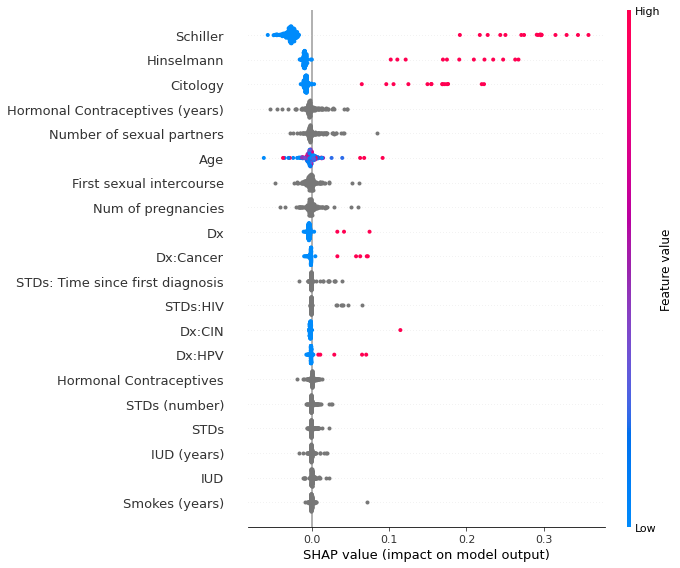

In [54]:
# Сводный график со значением Шепли (важность признака)
#A summary plot with the shapley value (feature importance) 
shap.summary_plot(shap_values[1], X_test)